<a href="https://colab.research.google.com/github/paranoidandroid2124/first-repository/blob/master/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

# 데이터 파일 경로 설정(아이펠 클라우드에서 불러오기)
path = os.getenv('HOME') + '/data/data/bike-sharing-demand/train.csv'

train = pd.read_csv(path)

# datetime 컬럼을 datetime 자료형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

# datetime 정보를 연, 월, 일, 시, 분, 초로 분리하여 새로운 열 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['min'] = train['datetime'].dt.minute
train['sec'] = train['datetime'].dt.second



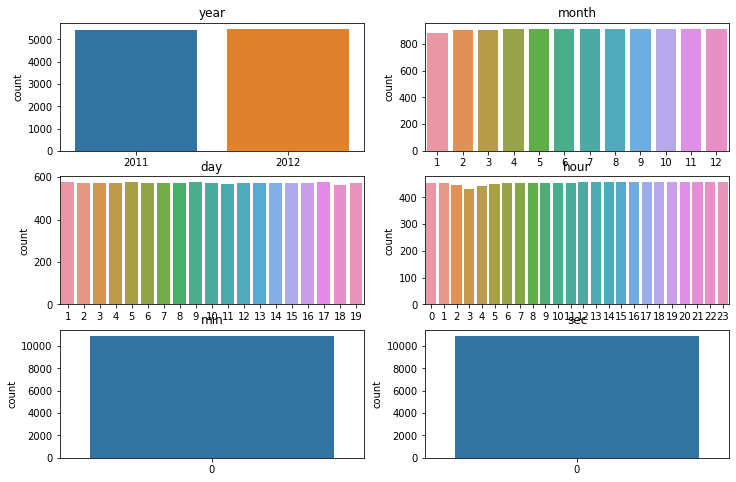

In [ ]:
# %%
# %% 연월일시분초 데이터 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

plt.subplot(321)
sns.countplot(data=train, x='year').set_xlabel('')
plt.title('year')

plt.subplot(322)
sns.countplot(data=train, x='month').set_xlabel('')
plt.title('month')

plt.subplot(323)
sns.countplot(data=train, x='day').set_xlabel('')
plt.title('day')

plt.subplot(324)
sns.countplot(data=train, x='hour').set_xlabel('')
plt.title('hour')

plt.subplot(325)
sns.countplot(data=train, x='min').set_xlabel('')
plt.title('min')

plt.subplot(326)
sns.countplot(data=train, x='sec').set_xlabel('')
plt.title('sec')

plt.show()

In [ ]:
# %%
from sklearn.model_selection import train_test_split

# print(train[['temp', 'atemp']].corr())
# temp, atemp 상관계수 커서 atemp 제거
# min, sec은 모두 0이라서 예측에 기여하지 않을듯?
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']]
y = train['count']


# 훈련 데이터와 테스트 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 선형회귀 모델
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# MSE 및 RMSE 계산
from sklearn.metrics import mean_squared_error as mse
mse_error = mse(y_pred,y_test)
rmse_error = mse_error ** 0.5
print('mse error = ', mse_error)
print('rmse error = ', rmse_error)

mse error =  19962.939395049958
rmse error =  141.29026645544258


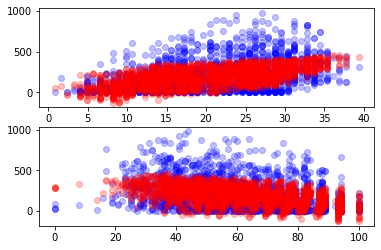

In [ ]:
# %%
# %% 예측 결과 시각화
plt.figure()

plt.subplot(211)
plt.scatter(X_test['temp'], y_test, alpha=0.25, c ='b')
plt.scatter(X_test['temp'], y_pred, alpha=0.25, c='r')

plt.subplot(212)
plt.scatter(X_test['humidity'], y_test, alpha=0.25, c='b')
plt.scatter(X_test['humidity'], y_pred, alpha=0.25, c='r')

plt.show()